Pour valider notre travail et valoriser l’aspect collaboratif de la salle, on a mis en place un scénario d’utilisation qui permettra de souligner son intérêt. Le scénario a été inspiré d’un challenge proposé dans un concours américain VAST 2019 (Visual Analytics Science and Technology).
En cas de séisme, les responsables reçoivent rapidement les relevés sismiques et les utilisent pour un déploiement initial mais ils réalisent qu’ils ont besoin de plus d’informations pour s’assurer qu’ils ont une compréhension réaliste des conditions réelles dans la ville. Dans ce cadre, la mairie a développé une nouvelle application mobile qui permet aux citoyens de fournir plus rapidement des informations relatives aux dégâts afin de mieux hiérarchiser les interventions des secouristes. On s’est intéressé au traitement des données issues de cette application pour identifier les zones préoccupantes. Pour ce faire, on a mobilisé les différentes technologies dans la salle. On a donc développé un programme permettant de traiter ces informations et de les visualiser afin de pouvoir optimiser les interventions dans la ville.

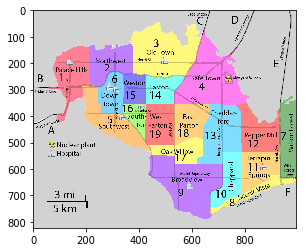

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("map.png")
plt.imshow(image)
plt.show()

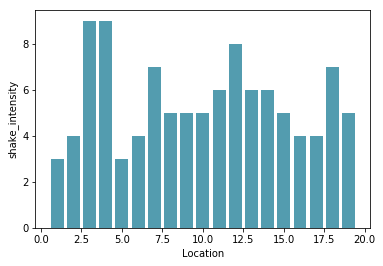

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
df = pd.read_csv("mc1-reports-data.csv")
#df=df.iloc[0:10000,:]
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    #ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
barplot(df['location'], df['shake_intensity'], x_label="Location", y_label="shake_intensity", title="")

#import Image

#image = Image.open('distribution.png')
#image.show()

In [19]:
print(df.iloc[0:20,:])


                   time  sewer_and_water  power  roads_and_bridges  medical  \
0   2020-04-08 17:50:00             10.0    6.0               10.0      3.0   
1   2020-04-09 13:50:00              2.0   10.0                0.0      8.0   
2   2020-04-09 00:20:00              7.0   10.0               10.0      9.0   
3   2020-04-08 17:25:00              1.0    1.0                2.0     10.0   
4   2020-04-08 02:50:00              9.0    7.0                1.0      6.0   
5   2020-04-09 05:30:00              2.0    7.0                3.0     10.0   
6   2020-04-08 04:30:00              2.0   10.0                1.0      2.0   
7   2020-04-10 11:00:00              5.0    0.0                4.0     10.0   
8   2020-04-10 19:40:00             10.0    7.0                7.0      1.0   
9   2020-04-07 22:00:00              6.0    6.0                5.0      7.0   
10  2020-04-09 23:00:00              4.0    0.0                6.0      7.0   
11  2020-04-08 15:30:00              2.0    4.0     

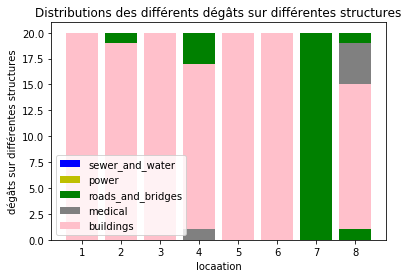

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("mc1-reports-data.csv")
#on travaille sur un echantillon
df=df.iloc[0:5000,:]
def stackedbarplot(x_data, y_data_list, colors, y_data_names="", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # For each category after the first, the bottom of the
            # bar will be the top of the last category
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'lower left')
    
y_data_list=[df['sewer_and_water'],df['power'],df['roads_and_bridges'],df['medical'],df['buildings']]    
stackedbarplot(df['location'], y_data_list, ['blue','y','g','grey','pink'], y_data_names= ['sewer_and_water', 'power', 'roads_and_bridges', 'medical','buildings'], x_label='locaation', y_label="dégâts sur différentes structures", title="Distributions des différents dégâts sur différentes structures")   


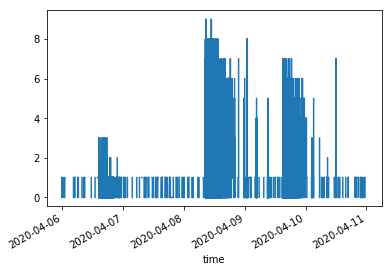

In [28]:
df2 = pd.read_csv('mc1-reports-data.csv', index_col=0, parse_dates=True)

test = df2.location==8
df2_df = df2[test]
ax = df2.loc['2020', 'shake_intensity'].plot(x,y,'.')